# **Data Wrangling**

Perform some fundamental data wrangling tasks that form the pre-processing phase of data analysis.

These tasks include handling missing values in data, formatting data to standardize it and make it consistent, normalizing data, grouping data values into bins, and converting categorical variables into numerical quantitative variables to ensure data quality and consistency.

You use data wrangling to convert data from an initial format to a format that may be better for analysis.

**Import Libraries**

In [45]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

**Import Data**

You can find the "Automobile Dataset" from the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

In [46]:
# Path to the CSV file
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

# Create the headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(path, names = headers)

In [47]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As you can see, several question marks appeared in the data frame; those missing values may hinder further analysis.
<div>So, how do we identify all those missing values and deal with them?</div>


<b>How to work with missing data?</b>

Steps for working with missing data:
<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>

## Identify and handle missing values

### Identify missing values
<h4>Convert "?" to NaN</h4>
In the car data set, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Use the function:
 <pre>replace(A, B, inplace = True) </pre>
to replace A by B.

In [48]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. Use the following functions to identify these missing values. You can use two methods to detect missing data: <br>
    - <b>isnull()</b><br>
    - <b>notnull()</b><br>

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [49]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Count missing values in each column**

Using a for loop in Python, you can quickly figure out the number of missing values in each column. "True" represents a missing value and "False" means the value is present in the data set. In the body of the for loop the method "value_counts()" counts the number of "True" values.

In [50]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

**Deal with missing data**

How should you deal with missing data?

* Drop data
  * Drop the whole row
  * Drop the whole column
* Replace data
  * Replace it by mean
  * Replace it by frequency
  * Replace it based on other functions


  You should only drop whole columns if most entries in the column are empty. In the data set, none of the columns are empty enough to drop entirely.
You have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. Apply each method to different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four".
        <ul>
            <li>Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.</li>
        </ul>
    </li>
</ul>


In [51]:
# Calculate the mean value for the "normalized-losses" column

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [52]:
# Replace "NaN" with mean value in "normalized-losses" column

#df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

df.loc[:, "normalized-losses"] = df["normalized-losses"].fillna(avg_norm_loss)

In [53]:
# Calculate the mean value for the "bore" column

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

# Replace "NaN" with the mean value in the "bore" column
df.loc[:, "bore"] = df["bore"].fillna(avg_bore)


Average of bore: 3.3297512437810943


In [54]:
#Calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df.loc[:, "stroke"] = df["stroke"].fillna(avg_stroke)

Average of stroke: 3.255422885572139


In [55]:
#Calculate the mean value for the "horsepower" column
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

# Replace "NaN" with the mean value in the "horsepower" column
df.loc[:, "horsepower"] = df["horsepower"].fillna(avg_horsepower)

Average horsepower: 104.25615763546799


In [56]:
# Calculate the mean value for "peak-rpm" column
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

# Replace "NaN" with the mean value in the "peak-rpm" column
df.loc[:, "peak-rpm"] = df["peak-rpm"].fillna(avg_peakrpm)

Average peak rpm: 5125.369458128079


In [57]:
# To see which values are present in a particular column, we can use the ".value_counts()" method:
df['num-of-doors'].value_counts()

,count
num-of-doors,
four,114
two,89


In [58]:
# We can also use the ".idxmax()" method to calculate the most common type automatically
df['num-of-doors'].value_counts().idxmax()

'four'

In [59]:
#replace the missing 'num-of-doors' values by the most frequent
df.loc[:, "num-of-doors"] = df["num-of-doors"].fillna(df['num-of-doors'].value_counts().idxmax())

In [60]:
# Drop all rows that do not have price data

# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [61]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
symboling
False    201
Name: count, dtype: int64

normalized-losses
normalized-losses
False    201
Name: count, dtype: int64

make
make
False    201
Name: count, dtype: int64

fuel-type
fuel-type
False    201
Name: count, dtype: int64

aspiration
aspiration
False    201
Name: count, dtype: int64

num-of-doors
num-of-doors
False    201
Name: count, dtype: int64

body-style
body-style
False    201
Name: count, dtype: int64

drive-wheels
drive-wheels
False    201
Name: count, dtype: int64

engine-location
engine-location
False    201
Name: count, dtype: int64

wheel-base
wheel-base
False    201
Name: count, dtype: int64

length
length
False    201
Name: count, dtype: int64

width
width
False    201
Name: count, dtype: int64

height
height
False    201
Name: count, dtype: int64

curb-weight
curb-weight
False    201
Name: count, dtype: int64

engine-type
engine-type
False    201
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    201
Name: count, dtype: int64

en

## **Correct data format**

Checking if all data is in the correct format.

In [62]:
# List the data types for each column

df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


As you can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, the numerical values 'bore' and 'stroke' describe the engines, so you should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. You have to convert data types into a proper format for each column using the "astype()" method.

In [63]:
# Convert data types to proper format

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [64]:
# List the columns after the conversion

df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


## Data Standardization
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>
<b>Example: </b>
<p>Transform mpg to L/100km:</p>
<p>In the data set, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume you are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>You will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>
<p>Use this formula for unit conversion:<p>
L/100km = 235 / mpg

In [65]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]

# check your transformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


## Data Normalization

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include:
<ol>
    <li>scaling the variable so the variable average is 0</li>
    <li>scaling the variable so the variance is 1</li>
    <li>scaling the variable so the variable values range from 0 to 1</li>
</ol>
</p>

<b>Example</b>
<p>Scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace the original value by (original value)/(maximum value)</p>

In [66]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## Binning
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>
<p>In this data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. If you only care about the price difference between cars with high horsepower, medium horsepower, and low horsepower (3 types), you could rearrange them into three ‘bins' to simplify analysis.</p>

Text(0.5, 1.0, 'Horsepower original (int)')

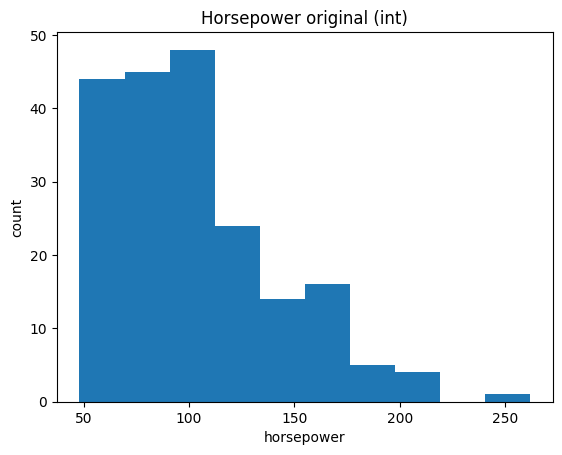

In [67]:
# Convert HP data to correct format
df["horsepower"]=df["horsepower"].astype(int, copy=True)

# Plot the histogram of horsepower to see the distribution of horsepower.
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower original (int)")

In [68]:
# Build a bin array with a minimum value to a maximum value

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [69]:
# Set group  names

group_names = ['Low', 'Medium', 'High']

In [70]:
# Apply the function "cut" to determine what each value of df['horsepower'] belongs to.

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'Horsepower bins')

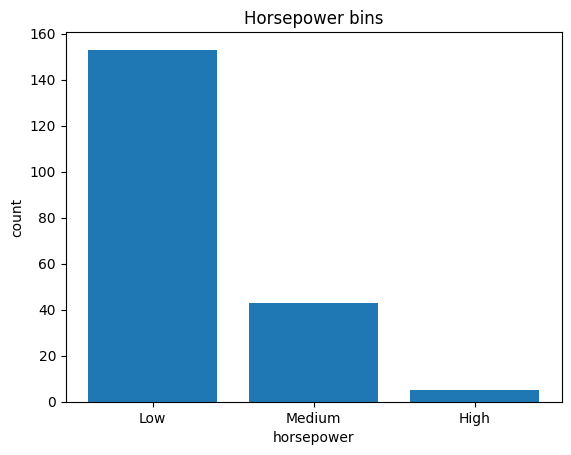

In [71]:
# Plot the distrinuition of horsepower to see the distribution of horsepower.

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower bins")

Text(0.5, 1.0, 'Horsepower (bins)')

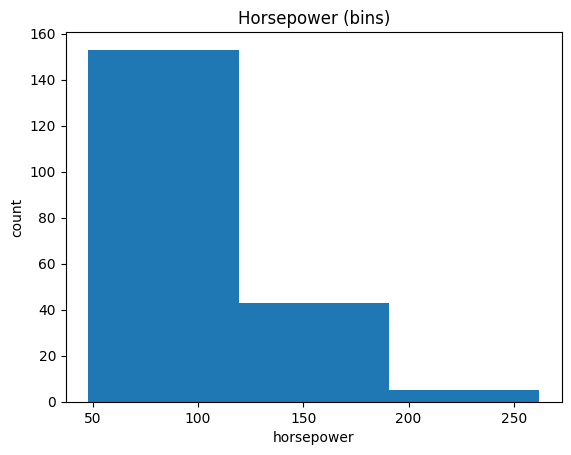

In [72]:
# On the Histogram, you could plot it with bins, if you only want it.

%matplotlib inline
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower (bins)")

## Indicator Variable, a.k.a. Dummy
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.
</p>
<p>
    You use indicator variables so you can use categorical variables for regression analysis, later on.
</p>
<b>Example</b>
<p>
    The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in a regression model, you can convert "fuel-type" to indicator variables.
</p>

In [73]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [74]:
# Change the column names for clarity

dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [75]:
# In the data frame, column 'fuel-type' now has values for 'gas' and 'diesel' as 0s and 1s.

# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,False,True


In [76]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [77]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

## Save the CSV

In [78]:
df.to_csv('/content/sample_data/clean_df.csv')